# Dependências

## Bibliotecas

In [22]:
import os
import pandas as pd
import missingno as msno
from dependencias.data_cleaning import remover_duplicatas, converter_tipos
from sklearn.model_selection import train_test_split
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)

## Dados e Constantes

In [28]:
DATA_RAW_PATH = os.path.join('..','data','raw')
DATA_RAW_NAME = 'HR_Engagement_Sat_Sales_UpdatedV4.0.csv'
DATA_INTER_PATH = os.path.join('..','data','inter') 
DATA_INTER_TRAIN_NAME = 'train_inter.csv'
DATA_INTER_TEST_NAME = 'test_inter.csv'

In [6]:
df_raw = pd.read_csv(os.path.join(DATA_RAW_PATH,DATA_RAW_NAME))

In [7]:
df_raw.head()

,ID,Name,Department,GEO,Role,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Validated_Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_4,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,sales,salary,Gender,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
0,1,BRADDY,Operations,US,VP,NaN,0,1.0,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,3,168,3,1,0,NaN,0,sales,low,M,5,4,3,1,1,1,1,2,1,NaN,1.0,2,4,2,2,2,2,2,2,1,5,1841,61,9
1,2,BORST,Sales,UK,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,5,159,2,0,0,NaN,0,accounting,low,F,58,3,3,4,3,2,1,2,1,0.0,NaN,2,2,1,4,1,3,2,5,1,5,1990,90,8
2,3,BIRDWELL,Finance,France,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,2,282,3,0,0,NaN,0,product_mng,medium,F,42,2,4,1,3,1,1,2,2,1.0,NaN,1,5,1,2,5,2,2,4,4,4,3193,80,8
3,4,BENT,Human Resources,China,Senior Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,4,278,4,1,0,NaN,0,product_mng,high,M,37,3,1,4,5,2,1,2,1,NaN,1.0,1,1,2,5,1,1,2,4,4,1,3248,77,6
4,5,BAZAN,IT,Korea,Director,NaN,0,NaN,3,6,6,0.4,3.0,3.0,4.0,3.0,5.0,2,3,2,3,2,5,5,4,4,3,0.36,6,256,5,0,0,NaN,0,sales,low,F,6,4,5,4,5,1,1,2,1,1.0,NaN,1,4,1,5,3,5,1,2,5,4,3149,80,10


In [8]:
df_raw.columns

Index(['ID', 'Name', 'Department', 'GEO', 'Role', 'Rising_Star', 'Will_Relocate', 'Critical', 'Trending Perf', 'Talent_Level', 'Validated_Talent_Level', 'Percent_Remote', 'EMP_Sat_OnPrem_1', 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_3', 'EMP_Sat_OnPrem_4', 'EMP_Sat_OnPrem_5', 'EMP_Sat_Remote_1', 'EMP_Sat_Remote_2', 'EMP_Sat_Remote_3', 'EMP_Sat_Remote_4', 'EMP_Sat_Remote_5', 'EMP_Engagement_1', 'EMP_Engagement_2', 'EMP_Engagement_3', 'EMP_Engagement_4', 'EMP_Engagement_5', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left_Company', 'CSR Factor', 'promotion_last_5years', 'sales', 'salary', 'Gender', 'LinkedIn_Hits', 'Emp_Work_Status2', 'Emp_Work_Status_3', 'Emp_Work_Status_4', 'Emp_Work_Status_5', 'Emp_Identity', 'Emp_Role', 'Emp_Position', 'Emp_Title', 'Women_Leave', 'Men_Leave', 'Emp_Competitive_1', 'Emp_Competitive_2', 'Emp_Competitive_3', 'Emp_Competitive_4', 'Emp_Competitive_5', 'Emp_Collaborative_1', 'Emp_Collaborative_2',
       'E

# Remoção de duplicatas

In [9]:
df_raw, list_duplicated_columns = remover_duplicatas(df_raw)

Removendo...
Existem 2 colunas duplicadas e 0 linhas duplicadas
Colunas duplicadas:
['Talent_Level', 'Validated_Talent_Level', 'EMP_Sat_OnPrem_2', 'EMP_Sat_OnPrem_4']


# Limpeza

## Conversão de Tipos

In [10]:
# Verificando quantidade de linhas e colunas
print(f'O dataset possui {df_raw.shape[0]} linhas e {df_raw.shape[1]} colunas')

O dataset possui 14999 linhas e 60 colunas


In [11]:
#Criando dicionário para os tipos das variáveis
dicionario_tipo= {}
dicionario_tipo['ID'] = 'int'
dicionario_tipo['Name'] = 'object'
dicionario_tipo['Department'] = 'object'
dicionario_tipo['GEO']= 'object'
dicionario_tipo['Role']= 'object'
dicionario_tipo['Rising_Star']='float'
dicionario_tipo['Will_Relocate']='int'
dicionario_tipo['Critical'] ='float'
dicionario_tipo['Trending Perf'] ='int'
dicionario_tipo['Talent_Level'] = 'int'
dicionario_tipo['Percent_Remote']='float'
dicionario_tipo['EMP_Sat_OnPrem_1']='float'
dicionario_tipo['EMP_Sat_OnPrem_2']='float'
dicionario_tipo['EMP_Sat_OnPrem_3']='float'
dicionario_tipo['EMP_Sat_OnPrem_5']='float'
dicionario_tipo['EMP_Sat_Remote_1']='int'
dicionario_tipo['EMP_Sat_Remote_2']='int'
dicionario_tipo['EMP_Sat_Remote_3']='int'
dicionario_tipo['EMP_Sat_Remote_4']='int'
dicionario_tipo['EMP_Sat_Remote_5']='int'
dicionario_tipo['EMP_Engagement_1']='int'
dicionario_tipo['EMP_Engagement_2']='int'
dicionario_tipo['EMP_Engagement_3']='int'
dicionario_tipo['EMP_Engagement_4']='int'
dicionario_tipo['EMP_Engagement_5']='int'
dicionario_tipo['last_evaluation']='float'
dicionario_tipo['number_project']='int'
dicionario_tipo['average_montly_hours']='int'
dicionario_tipo['time_spend_company']='int'
dicionario_tipo['Work_accident']='int'
dicionario_tipo['left_Company']='int'
dicionario_tipo['CSR Factor']='float'
dicionario_tipo['promotion_last_5years']='int'
dicionario_tipo['sales']='object'
dicionario_tipo['salary']='object'
dicionario_tipo['Gender']='object'
dicionario_tipo['LinkedIn_Hits']='int'
dicionario_tipo['Emp_Work_Status2']='int'
dicionario_tipo['Emp_Work_Status_3']='int'
dicionario_tipo['Emp_Work_Status_4']='int'
dicionario_tipo['Emp_Work_Status_5']='int'
dicionario_tipo['Emp_Identity']='int'
dicionario_tipo['Emp_Role']='int'
dicionario_tipo['Emp_Position']='int'
dicionario_tipo['Emp_Title']='int'
dicionario_tipo['Women_Leave']='float'
dicionario_tipo['Men_Leave']='float'
dicionario_tipo['Emp_Competitive_1']='int'
dicionario_tipo['Emp_Competitive_2']='int'
dicionario_tipo['Emp_Competitive_3']='int'
dicionario_tipo['Emp_Competitive_4']='int'
dicionario_tipo['Emp_Competitive_5']='int'
dicionario_tipo['Emp_Collaborative_1']='int'
dicionario_tipo['Emp_Collaborative_2']='int'
dicionario_tipo['Emp_Collaborative_3']='int'
dicionario_tipo['Emp_Collaborative_4']='int'
dicionario_tipo['Emp_Collaborative_5']='int'
dicionario_tipo['Sensor_StepCount']='int'
dicionario_tipo['Sensor_Heartbeat(Average/Min)']='int'
dicionario_tipo['Sensor_Proximity(1-highest/10-lowest)']='int'

In [12]:
#Convertendo valores faltosos para np.nan
df_raw.replace([None, 'Null', 'null','NULL', -np.inf, np.inf, -999, '-999', '-1',-1, ''], np.nan,inplace=True)

In [13]:
#Convertendo as variáveis
df_raw = converter_tipos(df=df_raw, dicionario_tipo=dicionario_tipo)

In [14]:
#Describe Numérico
df_raw.describe()

,ID,Rising_Star,Will_Relocate,Critical,Trending Perf,Talent_Level,Percent_Remote,EMP_Sat_OnPrem_1,EMP_Sat_OnPrem_2,EMP_Sat_OnPrem_3,EMP_Sat_OnPrem_5,EMP_Sat_Remote_1,EMP_Sat_Remote_2,EMP_Sat_Remote_3,EMP_Sat_Remote_4,EMP_Sat_Remote_5,EMP_Engagement_1,EMP_Engagement_2,EMP_Engagement_3,EMP_Engagement_4,EMP_Engagement_5,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left_Company,CSR Factor,promotion_last_5years,LinkedIn_Hits,Emp_Work_Status2,Emp_Work_Status_3,Emp_Work_Status_4,Emp_Work_Status_5,Emp_Identity,Emp_Role,Emp_Position,Emp_Title,Women_Leave,Men_Leave,Emp_Competitive_1,Emp_Competitive_2,Emp_Competitive_3,Emp_Competitive_4,Emp_Competitive_5,Emp_Collaborative_1,Emp_Collaborative_2,Emp_Collaborative_3,Emp_Collaborative_4,Emp_Collaborative_5,Sensor_StepCount,Sensor_Heartbeat(Average/Min),Sensor_Proximity(1-highest/10-lowest)
count,14999.000000,21.0,14999.000000,480.0,14999.0,14999.0,14999.000000,14871.0,14871.000000,14871.000000,14871.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,1713.0,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,7596.000000,4865.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7500.000000,1.0,0.499833,1.0,3.0,6.0,0.617321,3.0,2.731962,3.731962,3.943649,2.839723,4.367691,3.367691,3.761784,3.973598,4.047670,4.285752,3.761917,3.523835,2.523835,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,5.0,0.021268,18.553904,3.001867,3.014468,3.005800,3.002867,2.141343,2.116274,1.998400,1.990066,0.707741,0.908530,2.156010,2.987199,2.144010,2.999067,2.987066,2.979532,1.676245,2.998533,3.005200,3.016934,3406.693246,77.967198,6.399360
std,4329.982679,0.0,0.500017,0.0,0.0,0.0,0.193841,0.0,0.681369,0.681369,1.244511,0.776054,0.929979,0.929979,0.580834,1.367462,1.703696,1.277772,0.425924,0.851848,0.851848,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.0,0.144281,18.987335,1.413788,1.417319,1.418791,1.413008,1.023277,1.010454,0.865389,0.856232,0.454831,0.288306,1.032378,1.416793,1.030439,1.406128,1.412314,1.412579,0.865230,1.410058,1.410191,1.412225,1755.742272,7.252848,2.588091
min,1.000000,1.0,0.000000,1.0,3.0,6.0,0.400000,3.0,1.000000,2.000000,1.000000,2.000000,3.000000,2.000000,3.000000,2.000000,1.000000,2.000000,3.000000,2.000000,1.000000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,5.0,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1000.000000,60.000000,1.000000
25%,3750.500000,1.0,0.000000,1.0,3.0,6.0,0.400000,3.0,3.000000,4.000000,4.000000,2.000000,3.000000,2.000000,3.000000,2.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,5.0,0.000000,5.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1704.500000,75.000000,5.000000
50%,7500.000000,1.0,0.000000,1.0,3.0,6.0,0.800000,3.0,3.000000,4.000000,4.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.000000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,5.0,0.000000,9.000000,3.000000,3.000000,3.000000,3.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,3.000000,2.000000,3.000000,3.000000,3.000000,3376.000000,78.000000,7.000000
75%,11249.500000,1.0,1.000000,1.0,3.0,6.0,0.800000,3.0,3.000000,4.000000,5.000000,3.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,3.0000

In [15]:
# Describe categórico
df_raw.describe(include=['O'])

,Name,Department,GEO,Role,sales,salary,Gender
count,14997,14999,14999,14999,14999,14999,14999
unique,14997,6,9,7,10,3,2
top,NEMETH,Operations,UK,Level 2-4,sales,low,F
freq,1,2500,1772,6889,4140,7316,7596


# Colunas Desnecessárias

In [16]:
#Antes de prosseguir, droparei colunas de sexo e genero para evitar vies na análise. Além disso, 
# removeremos as colunas de Id e Nome que são únicos
columns_to_drop = ['ID','Name','Gender','Women_Leave','Men_Leave']
df_raw.drop(columns_to_drop, axis=1,inplace=True)

# Dados Faltosos

In [17]:
#faltosos
df_raw.isna().sum()

Department                                   0
GEO                                          0
Role                                         0
Rising_Star                              14978
Will_Relocate                                0
Critical                                 14519
Trending Perf                                0
Talent_Level                                 0
Percent_Remote                               0
EMP_Sat_OnPrem_1                           128
EMP_Sat_OnPrem_2                           128
EMP_Sat_OnPrem_3                           128
EMP_Sat_OnPrem_5                           128
EMP_Sat_Remote_1                             0
EMP_Sat_Remote_2                             0
EMP_Sat_Remote_3                             0
EMP_Sat_Remote_4                             0
EMP_Sat_Remote_5                             0
EMP_Engagement_1                             0
EMP_Engagement_2                             0
EMP_Engagement_3                             0
EMP_Engagemen

<AxesSubplot:>

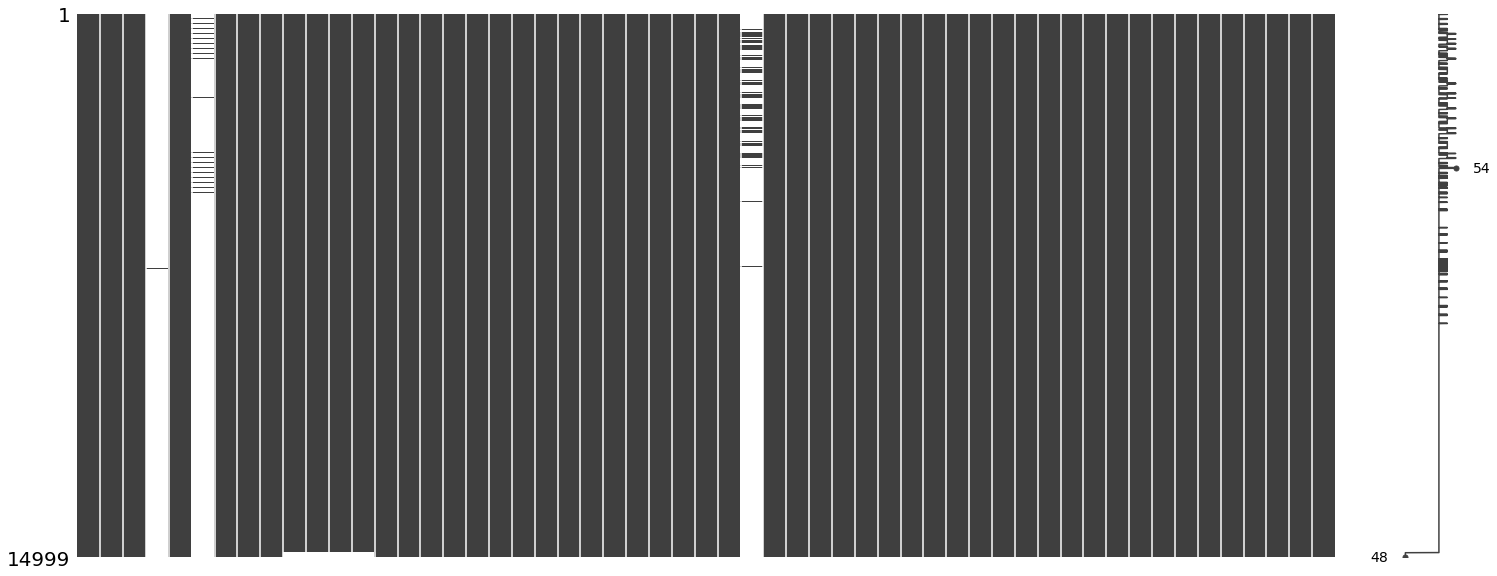

In [18]:
msno.matrix(df_raw)

In [19]:
#Removendo colunas com muitos missing
columns_to_drop_missing = ['Rising_Star','Critical','CSR Factor']
df_raw.drop(columns_to_drop_missing, axis=1,inplace=True)

In [20]:
#Tratando faltosos EMP_Sat_OnPrem 
cols_fillna_0 = ['EMP_Sat_OnPrem_1','EMP_Sat_OnPrem_2','EMP_Sat_OnPrem_3','EMP_Sat_OnPrem_5']
df_raw.loc[:,cols_fillna_0] = df_raw.loc[:,cols_fillna_0].fillna(0)

# Divisão dos Dados

In [23]:
df_train, df_test = train_test_split(df_raw, test_size = 0.2)

In [32]:
df_train.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TRAIN_NAME), index=False)
df_test.to_csv(os.path.join(DATA_INTER_PATH,DATA_INTER_TEST_NAME), index=False)